## Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline

## Background
Movie ratings have always been a major deciding factor on whether we watch a movie or not. IMDb and Rotten Tomatoes are two big names in the movie ratings domain. With this project, I have tried to analyse how the ratings between the two compares during the time period from 1970 to 2017.

## Table of Content

1. [Reading and Cleaning Data](#Read-and-Clean-Data)<br>
    1.1 [Read Data](#Read-Data)<br>
    1.2 [Format Data](#Drop-Columns)<br>
    1.3 [Clean Data](#Remove-Duplicates)<br>
2. [IMDb vs Rotten Tomatoes](#Analysis-1:-Comparison-Between-Ratings-from-Rotten-Tomatoes-and-IMDb-over-Time.)<br>
    2.1 [Graph for Comparison Over Time](#Comparison-Between-IMDb-and-Rotten-Tomatoes-Over-Time)<br>
    2.2 [Graph for Maximum and Minimum Scores Comparison](#Maximum/Minimum-Score-Comparisons)<br>
3. [Highest Gross Earning Genre(s) vs Highest Rated Genre(s)](#Analysis-2:-Do-Movies-with-Maximum-Score-Earn-the-Most?)<br>
    3.1 [Top Grossing Genre(s) in Past Decade](#Top-Grossing-Genre-in-Past-10-Years)<br>
    3.2 [Top Rotten Tomatoes Rated Genre(s) in Past Decade](#Top-Rotten-Tomatoes-Rated-Genre-in-Past-Decade)<br>
    3.3 [Top IMDb Rated Genre(s) in Past Decade](#Top-IMDb-Rated-Genre-in-Past-Decade)<br>

## Read and Clean Data

In [2]:
df_ratings = pd.read_csv('RT_vs_IMDb3.csv')

In [3]:
df_ratings.head(2)

,@,Difference,Avg0,Icon,Fresh,MaxScore,FilmName+Year,Size,Certified Fresh,Check Netflix,...,Movie Name,Number of Records,Rt Url,Time Period,Release Year,Search Tastedive,score,scorer,X',Y'
0,0.785398,100,0,AUDIENCE FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,89,audience,-7.778175,133.643182
1,0.785398,100,0,CRITIC FRESH,60,100,'Round Midnight (1986),1,0,https://www.netflix.com/search?q='Round%20Midn...,...,'Round Midnight,1,https://www.rottentomatoes.com/m/round_midnight,1985,1986,https://tastedive.com/movies/like/'Round-Midnight,100,critic,-7.778175,133.643182


## Drop Columns

In [4]:
df_ratings.columns = map(str.lower, df_ratings)

In [5]:
df_ratings.drop(columns=['@', 'difference', 'avg0', 'fresh', 'size', 'number of records', 'check netflix','check prime',
                         'concat recommendedfilm', 'film description', 'fulldescription', 'imdb url', 'rt url',
                         'search tastedive', 'x\'', 'y\'', 'filmname+year'], inplace=True)

## Remove Duplicates

In [6]:
df_ratings.drop_duplicates(inplace=True)

In [7]:
df_ratings.head(2)

,icon,maxscore,certified fresh,fresh/rotten,genre(s),imdb score,likes,movie id,movie name,time period,release year,score,scorer
0,AUDIENCE FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,89,audience
1,CRITIC FRESH,100,0,fresh,"Drama,Music",74,NaN,1,'Round Midnight,1985,1986,100,critic


# Analysis

## Analysis 1: Comparison Between Ratings from Rotten Tomatoes and IMDb over Time.

In [8]:
df_mean_scores = df_ratings.groupby('time period')[['score']].mean().reset_index()
df_mean_scores['score'] = df_mean_scores['score'].round(2)

### Comparison Between IMDb and Rotten Tomatoes Over Time

In [9]:
init_notebook_mode(connected=True)
Imdb_mean_scores = go.Box(x=df_ratings['time period'], y=df_ratings['imdb score'], name='IMDB_score')
RT_mean_scores = go.Scatter(x=df_mean_scores['time period'], y=df_mean_scores['score'], line=dict(width=4), 
                    text=df_mean_scores['score'], hoverinfo='text', mode='lines+markers', marker=dict(size=10, color='red'), 
                            opacity=1, showlegend=True, name='RT_mean_score')
layout1 = go.Layout(
        title='Comparison of IMDB and RT Mean Scores for Movies Over Time', 
               titlefont=dict(family='Arial', size=30, color='#00008B'),
        xaxis=dict(title='Time Period(Years)', titlefont=dict(size=25, color='#00008B'), showticklabels=True,
                   tickfont=dict(size=20, color='#00008B')),
        yaxis=dict(title='Mean Scores', titlefont=dict(size=25, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')),
        margin=dict(autoexpand=False, l=100, r=30, t=100))
fig1 = go.Figure(data=[Imdb_mean_scores, RT_mean_scores], layout=layout1)
plotly.offline.iplot(fig1)

Mean scores from rotten tomatoes is less than the mean scores from imdb per year for almost all of the years. Was it possible that the rotten tomatoes maximum score is also lesser than the maximum scores from imdb? The next part analyzes the two ratings mechanisms' maximum and minimum scores. 

In [10]:
df_max_scores = df_ratings.groupby('release year')[['imdb score', 'score']].max().reset_index()
df_min_scores = df_ratings.groupby('release year')[['imdb score', 'score']].min().reset_index()

### Maximum/Minimum Score Comparisons

In [11]:
init_notebook_mode(connected=True)
trace0 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['imdb score'], line=dict(width=4, color='#00FFFF'), 
                    text=df_max_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                             name='IMDB_max_score')
trace1 = go.Scatter(x=df_max_scores['release year'], y=df_max_scores['score'], line=dict(width=4), 
                    text=df_max_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='RT_max_score')
trace2 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['score'], line=dict(width=4, color='#E9967A'), 
                    text=df_min_scores['score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='RT_min_score')
trace3 = go.Scatter(x=df_min_scores['release year'], y=df_min_scores['imdb score'], line=dict(width=4, color='#6495ED'), 
                    text=df_min_scores['imdb score'], hoverinfo='text', mode='lines', opacity=1, showlegend=True, 
                           name='IMDB_min_score')
updatemenus = list([dict(active=-1, buttons=list([   
            dict(label='Maximum', method='update',
                 args=[{'visible': [True, True, False, False]}, {'title': 'Maximum Scores for IMDB and RT Over the Years', 
                                                      'titlefont': dict(size=22, color='#00008B')}]),
            dict(label='Minimum', method='update',
                 args=[{'visible': [False, False, True, True]}, {'title': 'Minimum Scores for IMDB and RT Over the Years', 
                                                      'titlefont': dict(size=22, color='#00008B')}]), 
            dict(label='Both', method='update',
                 args=[{'visible': [True, True, True, True]}, 
                         {'title': 'Comparison of IMDB and RT Minimum/Maximum Scores for Movies Over Time', 
                         'titlefont': dict(size=22, color='#00008B')}])]),
            direction='down', pad={'r': 10, 't': 10}, showactive=True, x=0.1, xanchor='left', y=1.1, 
                         yanchor='top', bordercolor='red', bgcolor='#C2C2C2')])
layout1 = go.Layout(
         title='Comparison of IMDB and RT Maximum/Minimum Scores for Movies Over Time', titlefont=dict(family='Arial', 
                                                                                            size=26, color='#00008B'),
         xaxis=dict(title='Release Years', titlefont=dict(size=25, color='#00008B'), showticklabels=True, 
                    tickfont=dict(size=20, color='#00008B')),
         yaxis=dict(title='Mean Scores', titlefont=dict(size=25, color='#00008B'), showticklabels=True,
                 tickfont=dict(size=20, color='#00008B')),
         plot_bgcolor='black',
         legend=dict(orientation="v", x=.5, y=.6, font=dict(family='sans-serif', size=15)),
         margin=dict(autoexpand=False, l=80, r=30, t=100), updatemenus=updatemenus, height=500, width=1000,)
fig1 = go.Figure(data=[trace0, trace1, trace2, trace3], layout=layout1)
plotly.offline.iplot(fig1)

Rotten Tomatoes maximum and minimums over the year are more extreme than imdb's minimum/maximum. It is because the critics score is separate in rotten tomatoes than the audience score and critics have the tendency to score 0 or 100 more than the audiences. 

In [12]:
df_ratings[(df_ratings['score'] == 100) | (df_ratings['score'] == 0)]['score'].value_counts()

0      78
100    62
Name: score, dtype: int64

In [13]:
df_ratings[(df_ratings['score'] == 100) | (df_ratings['score'] == 0)].groupby('scorer')[['score']].count()

,score
scorer,
critic,140


### It can be concluded from here that the total count of movies with a score of 0 or 100 in the rotten tomatoes is 140, and all these scores are given by the critics. <br> From analysis 1, it can also be said that imdb ratings are more of an average ratings for the movies, since the mean score of imdb score only ranges between 68-62. 

## Analysis 2: Do Movies with Maximum Score Earn the Most?

In [14]:
top_grossing_movies = {'Title': ['Pirates of the Caribbean: At World\'s End', 'The Dark Knight', 'Avatar', 'Toy Story 3',
                          'Harry Potter and the Deathly Hallows Part 2', 'Marvel\'s The Avengers', 'Frozen',
                          'Transformers: Age of Extinction', 'Star Wars: The Force Awakens', 'Captain America: Civil War',
                          'Star Wars: The Last Jedi'],
            'Worldwide Gross': [963420425, 1004558444, 2787965087, 1066969703, 1341511219, 1518812988, 1290000000, 1104039076, 
                               2068223624, 1153304495, 1332539889],
                  'Release Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 
                    'Imdb Score': [71, 90, 78, 83, 81, 81, 75, 57, 80, 78, 72],
                'RT Critic Score': [45, 94 , 83, 99, 81, 92, 90, 18, 93, 91, 91], 
                'RT Audience Score': [72, 94, 82, 89,  89, 91, 85, 51, 87, 89, 46], 
                'Genre(s)': ['Action,Adventure,Fantasy', 'Action,Crime,Drama', 'Action,Adventure,Fantasy', 
                             'Animation,Adventure,Comedy', 'Adventure,Drama,Fantasy', 'Action,Adventure,Sci-Fi', 
                             'Animation,Adventure,Comedy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy', 
                             'Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy']}

In [15]:
df_top_grossing_movies = pd.DataFrame(data=top_grossing_movies).infer_objects()

In [16]:
df_top_grossing_movies.head(1)

,Title,Worldwide Gross,Release Year,Imdb Score,RT Critic Score,RT Audience Score,Genre(s)
0,Pirates of the Caribbean: At World's End,963420425,2007,71,45,72,"Action,Adventure,Fantasy"


### Top Grossing Genre in Past 10 Years

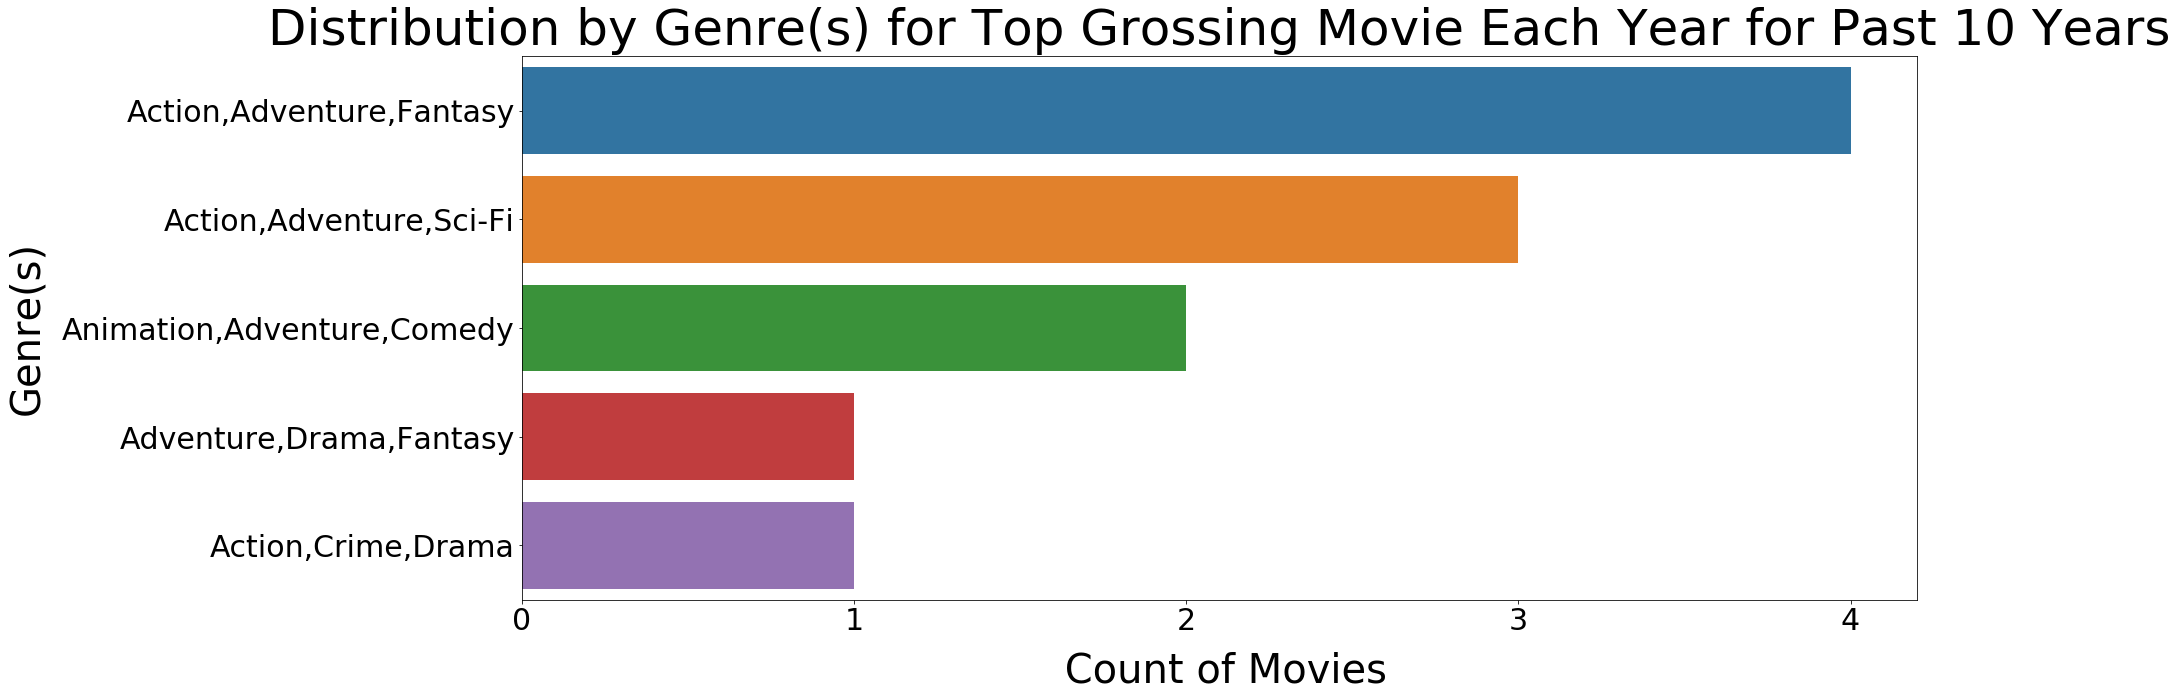

In [17]:
plt.figure(figsize=(25, 10))
xtick = [0,1,2,3,4]
sns.countplot(y='Genre(s)', data=df_top_grossing_movies, orient='h', 
              order=df_top_grossing_movies['Genre(s)'].value_counts().index)
plt.title("Distribution by Genre(s) for Top Grossing Movie Each Year for Past 10 Years", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

In [18]:
df_rt_audience = df_ratings[(df_ratings['scorer'] == 'audience') & (df_ratings['release year'] > 2007)]
df_rt_top_score = df_rt_audience.loc[df_rt_audience.groupby('release year')['score'].idxmax()]

### Top Rotten Tomatoes Rated Genre in Past Decade

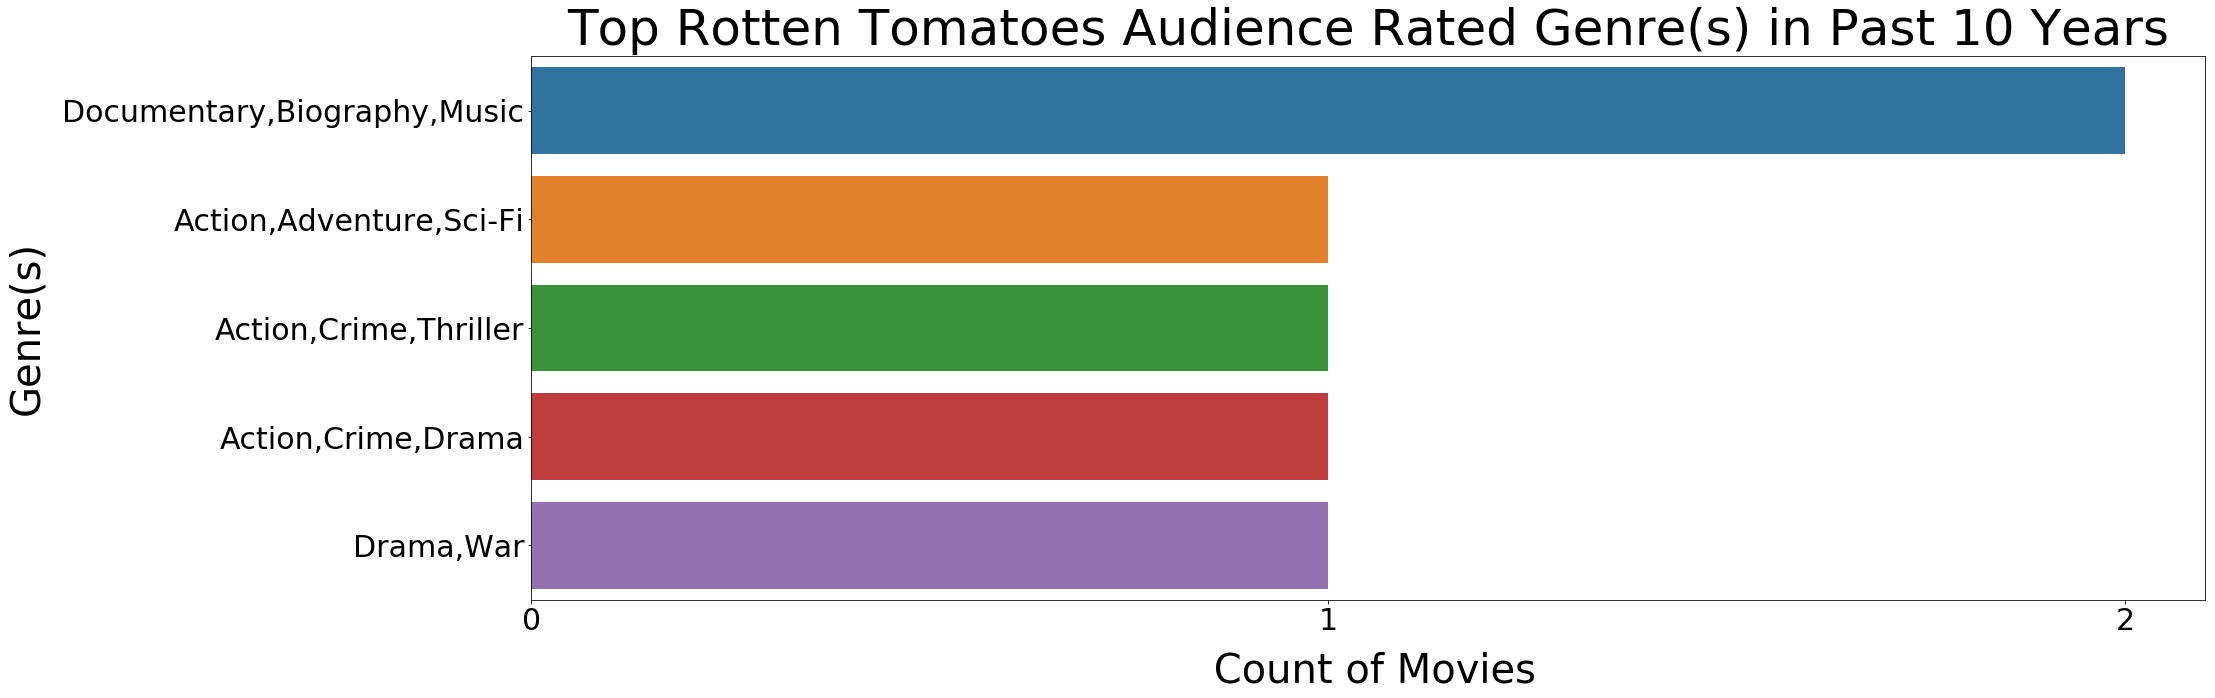

In [19]:
plt.figure(figsize=(30, 10))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_rt_top_score, orient='h',
              order=df_rt_top_score['genre(s)'].value_counts().iloc[:5].index)
plt.title("Top Rotten Tomatoes Audience Rated Genre(s) in Past 10 Years", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

The Genre(s) that are most loved by the audience in terms of earnings are not the ones that are rated the highest by the rotten tomatoes critics. Since from the Analysis 1, it was assumed that the imdb rating is closer to how the audience reacted to the movies, the next step was to establish this as the truth than just a myth.

In [20]:
df_top_score = df_ratings.loc[df_ratings.groupby('release year')['imdb score'].idxmax()]

### Top IMDb Rated Genre in Past Decade

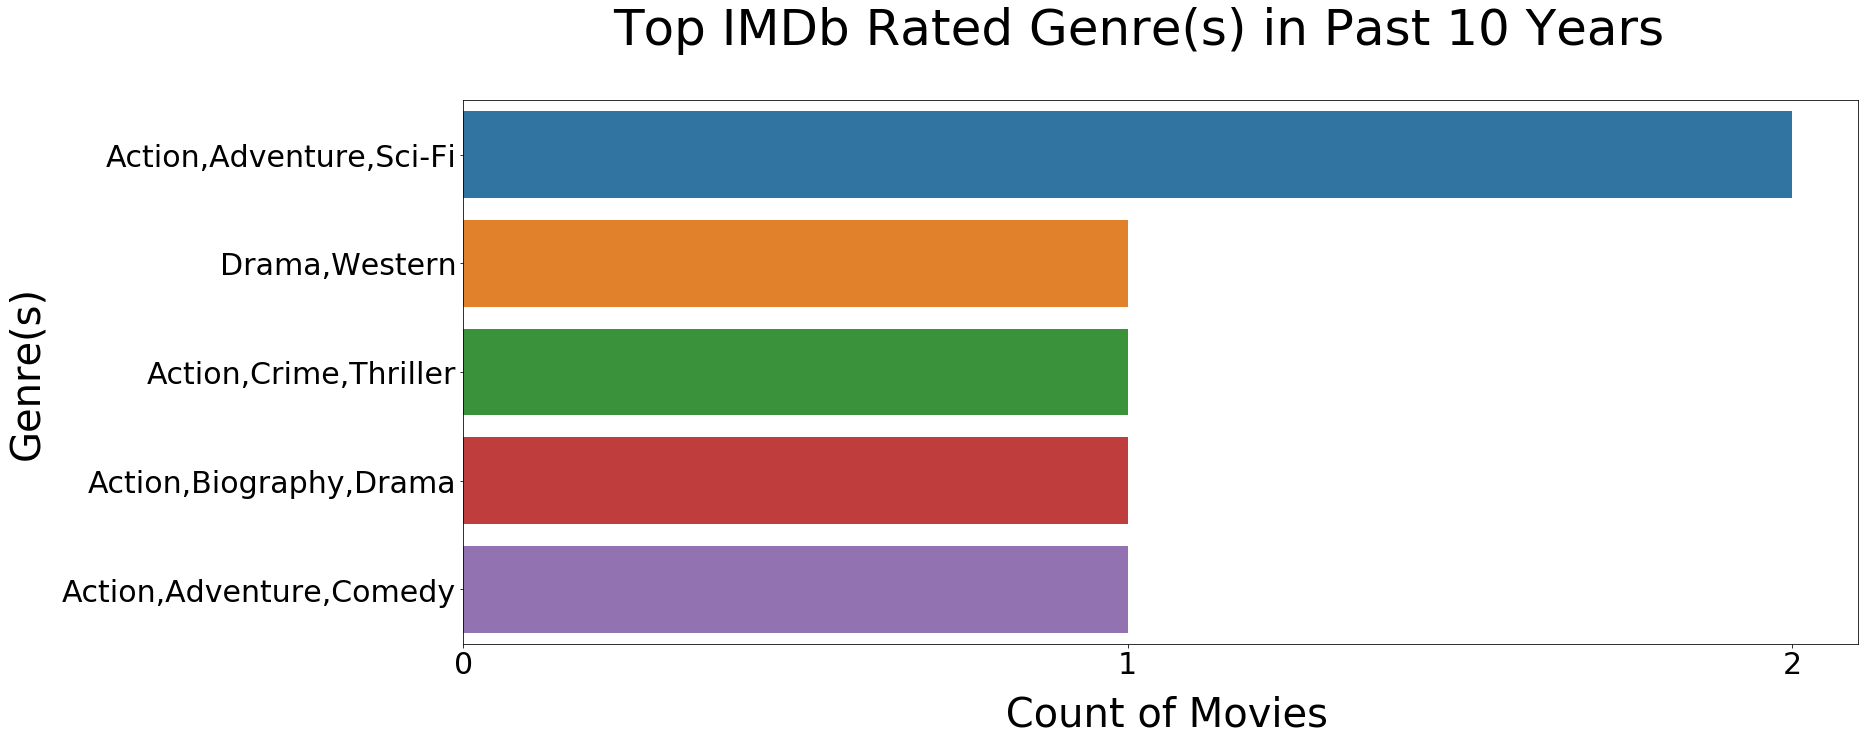

In [21]:
plt.figure(figsize=(25, 10))
xtick = [0,1,2]
sns.countplot(y='genre(s)', data=df_top_score[df_top_score['release year'] > 2007], orient='h',
              order=df_top_score[df_top_score['release year'] > 2007]['genre(s)'].value_counts().iloc[:5].index)
plt.suptitle("Top IMDb Rated Genre(s) in Past 10 Years", y=1.01, fontsize=50)
plt.xlabel(" Count of Movies", labelpad=15, fontsize=40)
plt.ylabel("Genre(s)", labelpad=15, fontsize=40)
plt.xticks(xtick, fontsize=30)
plt.yticks(fontsize=30);

### It can be concluded that the genre(s) that earned the most in the past decade are the genre(s) that have the highest imdb score as well. <br> Conclusion: IMDB ratings give the audiences' perceptions whereas the rotten tomatoes ratings can be used to view the critic's perception about a particular movie. 